In [11]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential,Model,initializers,layers,Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
#full pre-activation방식
def conv2_x(x):

    x1=layers.BatchNormalization()(x)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=64,kernel_size=(1,1),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
  
    x2=layers.Add()([x,x1])
    x2=layers.ReLU()(x2)

    return x2

In [3]:
def conv3_x(x):
    x1=layers.Conv2D(filters=128,kernel_size=(1,1),strides=(1,1),padding='same')(x)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=512,kernel_size=(1,1),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
  
    x2=layers.Add()([x,x1])
    x2=layers.ReLU()(x2)

    return x2

In [4]:
def conv4_x(x):
    x1=layers.Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),padding='same')(x)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=1024,kernel_size=(1,1),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
  
    x2=layers.Add()([x,x1])
    x2=layers.ReLU()(x2)

    return x2

In [5]:
def conv5_x(x):
    x1=layers.Conv2D(filters=512,kernel_size=(1,1),strides=(1,1),padding='same')(x)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=2048,kernel_size=(1,1),strides=(1,1),padding='same')(x1)
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
  
    x2=layers.Add()([x,x1])
    x2=layers.ReLU()(x2)

    return x2

In [6]:
def ReductionBlock(x,f1,f2):

    x=layers.Conv2D(filters=f1,kernel_size=(1,1),strides=(1,1),padding='same')(x)
    x=layers.BatchNormalization()(x)
    x=layers.ReLU()(x)
    x=layers.Conv2D(filters=f1,kernel_size=(3,3),strides=(2,2),padding='same')(x)
    x=layers.BatchNormalization()(x) 
    x=layers.ReLU()(x)
    x=layers.Conv2D(filters=f2,kernel_size=(1,1),strides=(1,1),padding='same')(x)
    x=layers.BatchNormalization()(x)
    x=layers.ReLU()(x)

    return x
    

In [15]:
dir=r'D:\dataset\butterfly\train'
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
dir,
labels="inferred",
label_mode="int",
class_names=None,
color_mode="rgb",
batch_size=4,
image_size=(224, 224),
shuffle=True,
seed=10,
validation_split=0.1,
subset='training',
interpolation="gaussian",
follow_links=False,
crop_to_aspect_ratio=False,)


validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
dir,
labels="inferred",
label_mode="int",
class_names=None,
color_mode="rgb",
batch_size=4,
image_size=(224, 224),
shuffle=True,
seed=10,
validation_split=0.1,
subset='validation',
interpolation="gaussian",
follow_links=False,
crop_to_aspect_ratio=False,)

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

Found 1257 files belonging to 10 classes.
Using 1132 files for training.
Found 1257 files belonging to 10 classes.
Using 125 files for validation.


In [16]:
input=Input(shape=(224,224,3))
x=layers.Conv2D(filters=64,kernel_size=(7,7),strides=(2,2),padding='same')(input)
x=layers.BatchNormalization()(x)
x=layers.ReLU()(x)
x=layers.MaxPooling2D(pool_size=(3,3),strides=(2,2))(x)

x=layers.Conv2D(filters=64,kernel_size=(1,1),strides=(1,1),padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.ReLU()(x)
x=layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same')(x)
x=layers.BatchNormalization()(x) 
x=layers.ReLU()(x)
x=layers.Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.ReLU()(x)
x=conv2_x(x)
x=conv2_x(x)

x=ReductionBlock(x,128,512)
x=conv3_x(x)
x=conv3_x(x)
x=conv3_x(x)

x=ReductionBlock(x,256,1024)
x=conv4_x(x)
x=conv4_x(x)
x=conv4_x(x)
x=conv4_x(x)
x=conv4_x(x)

x=ReductionBlock(x,512,2048)
x=conv5_x(x)
x=conv5_x(x)

x=layers.GlobalAveragePooling2D()(x)
output=layers.Dense(units=10,activation='softmax')(x)

model = tf.keras.models.Model(input,output)

In [17]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_49 (Conv2D)             (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_51 (BatchN  (None, 112, 112, 64  256        ['conv2d_49[0][0]']              
 ormalization)                  )                                                           

In [18]:
model_checkpoint_best_path=r'D:\GitHub_repo\CNN-Model-Application\save_weights\ReNet50/'
model_checkpoint_best=ModelCheckpoint(filepath=model_checkpoint_best_path,monitor='val_acc',save_best_only=True,save_weights_only=True,save_freq='epoch')
early_stopping=EarlyStopping(monitor='val_acc',patience=30,min_delta=1e-4)

In [19]:
lr_rate=tf.keras.optimizers.schedules.ExponentialDecay(1e-3, 10000, 0.97, staircase=False, name=None)

    
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_rate),loss='sparse_categorical_crossentropy',metrics=['acc'])


In [20]:
with tf.device("/device:GPU:0"):
    history=model.fit(train_ds,validation_data=validation_ds,epochs=50,batch_size=4,verbose=1,callbacks=[early_stopping,model_checkpoint_best])

Epoch 1/50
283/283 [==============================] - 49s 109ms/step - loss: 2.7422 - acc: 0.1511 - val_loss: 11.3484 - val_acc: 0.2480
Epoch 2/50
283/283 [==============================] - 26s 90ms/step - loss: 2.3795 - acc: 0.1935 - val_loss: 4.8075 - val_acc: 0.2320
Epoch 3/50
283/283 [==============================] - 26s 92ms/step - loss: 2.2133 - acc: 0.2730 - val_loss: 50.6610 - val_acc: 0.1120
Epoch 4/50
283/283 [==============================] - 25s 88ms/step - loss: 2.0836 - acc: 0.2544 - val_loss: 2.2004 - val_acc: 0.1760
Epoch 5/50
283/283 [==============================] - 27s 97ms/step - loss: 2.0628 - acc: 0.2889 - val_loss: 1.9434 - val_acc: 0.3280
Epoch 6/50
283/283 [==============================] - 27s 96ms/step - loss: 1.8408 - acc: 0.3525 - val_loss: 6.1852 - val_acc: 0.3360
Epoch 7/50
283/283 [==============================] - 28s 100ms/step - loss: 1.8567 - acc: 0.3534 - val_loss: 141.6219 - val_acc: 0.3600
Epoch 8/50
283/283 [==============================] - 28

In [23]:
model.load_weights(model_checkpoint_best_path)
test_loss,test_acc=model.evaluate(validation_ds,verbose=1)

32/32 [==============================] - 1s 26ms/step - loss: 0.4117 - acc: 0.8960


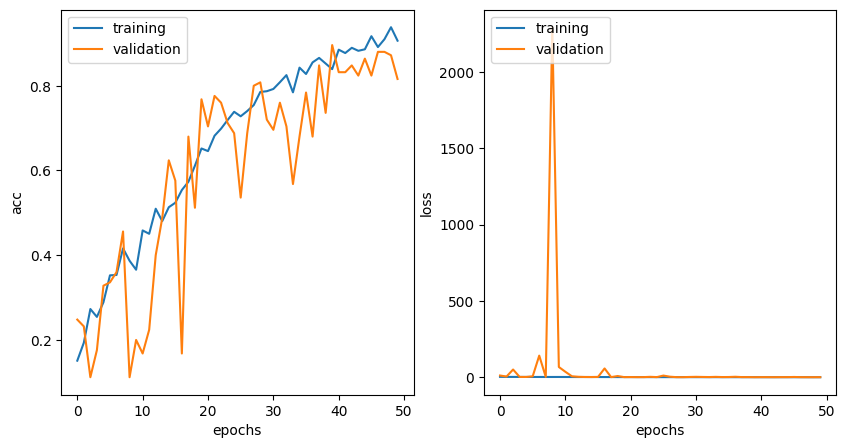

In [25]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='upper left')

plt.show()